Up until now, we've focused on modeling regression problems - that is, predicting a *numerical* quantity from a given dataset. We explored the following workflow in the context of linear regression:

1. Choose a model
2. Choose a loss function
3. Fit the model
4. Evaluate model performance

In this lecture, we will look at an entirely new modeling problem in **classification**, which involves predicting a *categorical* variable. We will discuss how to modify the steps in our existing modeling framework to meet the needs of this new machine learning problem.

## Regression vs. Classification

You may have seen this diagram which outlines the taxonomy of machine learning.

![](images/ml_taxonomy.png) 

<br /> Regression and classification are both **supervised learning** problems, meaning they consist of models that learn from data where the $y$ observations are known. You've likely seen examples of classification models before - for example, the k-nearest neighbors algorithm from Data 8. This lecture will focus on another such model known as **Logistic Regression**. 

More generally, a classification problem aims to *categorize* data. Today, we will focus on **binary classification**, a classification problem where data may only belong to one of two groups. One such example is the result of a coin toss. Many of the principles we'll learn today can extended to three or more groups - called **multiclass classification**. In the next few lectures, we will learn about models designed specifically for these problems.

## Intuition: The Coin Flip

To build some intuition for logistic regression, let's look at an introductory example to classification: the coin flip. Suppose we observe some outcomes of a coin flip (1 = Heads, 0 = Tails).

In [ ]:
flips = [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
flips

For the next flip, would you predict heads or tails?

A reasonable model is to assume all flips are IID (independent and identitically distributed). In other words, each flip has the same probability of returning a 1 (or heads). Let's define a parameter $\theta$, the probability that the next flip is a heads. We will use this parameter to inform our decision for $\hat y$, or our 0 -- 1 prediction of the next flip. If $\theta \ge 0.5, \hat y = 1, \text{else } \hat y = 0$.

You may be inclined to say $0.5$ is the best choice for $\theta$. However, notice that we made no assumption about the coin itself. The coin may be biased, so we should make our decision based only on the data. We know that exactly $\frac{4}{10}$ of the flips were heads, so we should think $\hat \theta = 0.4$. In the next section, we will mathematically prove why this is the best possible estimate.

### Likelihood of Data

Let's call the result of the coin flip a random variable $Y$. This is a Bernoulli random variable with two outcomes. $Y$ has the following distribution: 

$$P(Y = y) = \begin{cases}
        1, \text{with probability }  \theta\\
        0, \text{with probability }  1 - \theta
    \end{cases} $$

$\theta$ is unknown to us. But we can find the $\theta$ that makes the data we observed the most *likely*, by looking towards the **likelihood** of the data. The likelihood is proportional to the probability of observing the data. 

The probability of observing 4 Heads and 6 Tails follows the Binomial Distribution.

$$\binom{10}{4} (\theta)^4 (1-\theta)^6$$ 

The likelihood is proportional to the probability above. To find it, simply multiply the probabilities of obtaining each coin flip.

$$(\theta)^{4} (1-\theta)^6$$ 

The technique known as **maximum likelihood estimation** finds the $\theta$ that maximizes the above likelihood. You can find this maximum by taking the derivative of the likelihood, but we'll provide a more intuitive graphical solution.

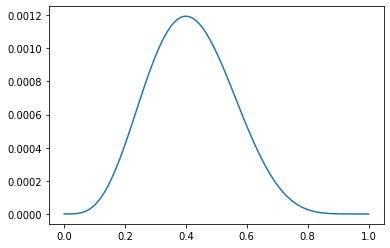

In [1]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 1, 100)
plt.plot(theta, theta**4 * (1-theta)**6);

You can see this function is maximized at the value $0.4$. Thus, $\hat\theta = 0.4$. We will revisit these methods in our derivation of the logistic regression model.

## Deriving the Logistic Regression Model

### Probabalistic Model

What if instead of a 0-1 prediction response, the model returns the probability of data belonging to binary classes?
 - If the model's predicted probability is **greater** than 0.5, classify as **class 1**.
 - If the model's predicted probability is **less** than 0.5, classify as **class 0**.
 
The model still uses the concept of classification activation as a way to aggregate multiple features using a weighted combination of features.

The probabilistic classifier learns to generate the following probabilities and with the decision threshold of 0.5, classifies datapoints into two categories:

<img src="images/classifier_rule.png" alt='classifier_rule' width='500'>



### Odds Ratio

**Odds** is defined as the ration of the probability of an event happening ($p$) vs. it not happening ($1-p$). 
 - "9 to 1 against" means $p = 0.1$
 - "Even odds" means $p = 0.5$
 - "3 to 1 on" means $p = 0.75$

$$\text{odds}(p) = \frac{p}{1 - p}$$

**Domain** of odds function: $[0, 1)$

**Range** of odds function: $[0, +\infty)$

Thus, the odds function maps values on $[0, 1)$ to $[1, \infty)$.

<img src="images/odds_ratio.png" alt='odds_ratio' width='500'>


### Logit Function

Our end goal is to use a classification activation to output a probability value based on some unbounded real number. Currently, the odds ratio takes a probability value and outputs a positive real number. If we further transform the odds function to obtain a function that maps a probability to an unbouded real number, the inverse of that function will be our desired result.   

Thus, we first need a transformation takes the ouput of the odds function and maps it to an unbounded real number (i.e. maps $[0, \infty)$ to $(-\infty, \infty)$). 

Taking the **log** of a positive real number creates an unbounded real number!

Applying this transformation to the odds ratio gives us the **Logit Function**:

$$\text{log-odds}(p) = \text{log}(\frac{p}{1-p})$$

<img src="images/logit_graph.png" alt='logit_graph' width='500'>


#### Logistic Function: Inverse of the Logit Function

$$\text{log}(\frac{p}{1-p}) = z$$ 
$$\frac{p}{1-p} = e^{z}$$ 
$$p = e^{z} - pe^{z}$$
$$p + pe^{z} = e^{z}$$
$$(1 + e^{z})p = e^{z}$$
$$p = \frac{e^{z}}{1 + e^{z}}$$
$$p = \frac{1}{1 + e^{z}}$$


#### Logistic Regression Model Summary

1. Optimize the model to find parameters $\vec{\hat{\theta}}$
2. Use parameters to calculate classification activation: $z = \vec{\hat{\theta}}^{T}\vec{x}$
3. Apply the logistic function to get the probabability of a given datapoint belonging to class 1.



### The Logistic Function

While it may look daunting, the logistic regression model is just a composition of two simpler functions. One of these we know well from OLS -- the linear model $x^T\theta$. The second is the **logistic function** -- commonly referred to as the **sigmoid function**.

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

<img src="images/logistic_func.png" alt='logistic_func' width='500'>

This logistic function has various properties, although we won't prove any of them.


1. Definition: $\sigma(t) = \frac{1}{1 + e^{-t}} = \frac{e^t}{1 + e^{t}}$
2. Reflection/Symmetry: $1 - \sigma(t) = \frac{e^{-t}}{1 + e^{-t}} = \sigma(-t)$
3. Inverse: $t = \sigma^{-1}(p) = \log(\frac{p}{1-p})$
4. Domain: $-\infty < t < \infty$
5. Range: $0 < \sigma(t) < 1$

You'll notice the logistic regression model is just the logistic function evaluated on the linear model $x^T\theta$. The logistic function squashes the result of $x^T\theta$ to a probability between $0$ and $1$. Larger values of $x^T\theta$ will be mapped to probabilities closer to $1$, and vice versa. Putting it all together, we have:

$$P(Y = 1|x) = \sigma(x^T\theta) = \frac{1}{1 + e^{-x^T\theta}}$$


## The Logistic Regression Model

The figure below summarizes the logistic regression process:

<img src="images/logistic_regression_process.png" alt='logistic_regression_process' width='500'>

### Example Calcualtion

Suppose we want to predict the probability that a tumor is malignant, given it's mean radius and mean smoothness. Assume that we fit a logistic regression model (with no intercept), and somehow estimate the optimal parameters: $\hat \theta = [0.1, -0.5]$.

Say we encounter a new breast tumor with data: $x = [15, 1]$. We want to answer two questions:

1. What is the probability that this tumor is malignant?
2. Should we predict the tumor is malignant or benign?

$$P(Y = 1|x) = \sigma(x^T\hat\theta)$$ 
$$= \sigma(0.1 * 15 + (-0.5) * 1) = \sigma(1)$$
$$= \frac{1}{1 + e^{-1}}$$
$$\approx 0.7311$$

Because the tumor has a $73\%$ chance of being malignant, we should predict $\hat y = 1$.

### Parameter Interpretation

In our derivation of logistic regression, we showed that $\frac{p}{1-p} = e^{x^T\theta}$. Equivalently, 
$$\frac{P(Y=1|x)}{P(Y=0|x)} = e^{x^T\theta}$$

Imagine our linear component has just a single feature, along with an intercept term.

$$\frac{P(Y=1|x)}{P(Y=0|x)} = e^{\theta_0 + \theta_1 x}$$

What happens when you increase $x$ by one unit?

- Odds is multiplied by $e^{\theta_1}$
- If $\theta_1 > 0$, then odds increase.
- If $\theta_1 < 0$, then odds decrease.

Rememer, the odds ratio can be interpreted as the “number of successes for each failure.” When odds increase, the proportion of successes likewise increases.

### Comparison to Linear Regression

#### Linear Regression

<img src="images/linear_regression.png" alt='linear_regression' width='800'>

#### Logistic Regression

<img src="images/logistic_regression.png" alt='logistic_regression' width='800'>

## Parameter Estimation

Having derived the logistic regression model, the next step is to estimate the optimal parameters $\hat\theta$.

### Pitfalls of Squared Error Loss
In linear regression, we found these optimal parameters by minimizing a cost function. The same applies to logistic regression. Let's begin by evaluating the MSE loss function on the logistic regression model.

$$L(\theta) = \frac{1}{n}\sum_{i=1}^{n} (y_i - \sigma(x_i^T\theta))^2$$

However, there are 3 flaws with this approach.

#### 1. Non-convex 

The MSE loss surface for logistic regression is non-convex. In the following example, you can see the function rises above the secant line, a clear violation of convexity.

<img src="images/mse_secant_line.png" alt='mse_secant_line' width='500'>

Depending on the initialization points, gradient descent may find multiple non-optimal solutions.

#### 2. Bounded

A good loss function should penalize incorrect predictions; the MSE doesn't do this. Consider the following scenario.

- The predicted probability that some tumor is malignant is $0.99$ ($\hat y = 0.99$). However, this tumor is truly benign ($y = 0$). The loss incurred by this misprediction is only $(0 - 0.99)^2 = 0.98$. 

In fact, loss is always bounded $< 1$.

#### 3. Conceptually Questionable

The MSE loss function itself is conceptually questionable. 

- $y$ is a class label
- $\hat y$ is a probability

Why are we squaring the difference of a class label and probability?

### Cross-Entropy Loss

This section will introduce a more intuitive loss function - cross-entropy loss. The **cross-entropy loss** is defined as 

$$L(\theta) = -(y\text{ log}(p) + (1-y)\text{log}(1-p))$$

$$\text{where } p = \sigma(x^T\theta)$$

The average risk over an entire dataset is

$$R(\theta) = -\frac{1}{n} \sum_{i=1}^{n}(y_i\text{ log}(p) + (1-y_i)\text{log}(1-p))$$

Cross-entropy loss addresses the 3 pitfalls of squared loss.

1. Convex. No local minima for logistic regression
2. A good measure of model error. Strongly penalizes bad predictions.
3. Conceptually sound.

#### 1. Convex

To prove that cross-entropy loss is *always* convex, we'll need to take its derivative, which becomes difficult and out of scope. Instead, in Data 100, we will show a proof by picture.

Plotted below is the cross-entropy loss function applied to the same toy dataset as before. As you'll notice, this is a convex function - any line connecting two points lies entirely *above* the function.

<img src="images/cle-convex.png" alt='cle-convex' width='500'>

#### 2. Strong Error Penalization

To understand why cross-entropy loss has strong penalization, we need to take a step back. Let's decompose the loss function into two components.

$$L(\theta) = -(y\text{ log}(p) + (1-y)\text{log}(1-p))$$

1. $-(1-y)\text{ log}(1 - p)$
    - For $y = 0$, only this term stays in cross-entropy loss
    - See the plot on the bottom left. 
        - $p \rightarrow 0$: zero loss
        - $p \rightarrow 1$: infinite loss

2. $- y\text{ log}(p)$
    - For $y = 1$, only this term stays in cross-entropy loss
    - See the plot on the bottom right.
        - $p \rightarrow 0$: infinite loss
        - $p \rightarrow 1$: zero loss

:::: {.columns}

::: {.column width="30%"}
<img src="images/cle-loss-y_is_0.png" alt='cle-loss-y_is_0' width='400'>
:::

::: {.column width="20%"}
:::

::: {.column width="30%"}
<img src="images/cle-loss-y_is_1.png" alt='cle-loss-y_is_1' width='400'>
:::

::::

#### 3. Conceptually Sound

To understand why cross-entropy loss makes a great intuitive loss function, we will look towards maximum likelihood estimation in the next section.


## Deriving the Logistic Regression Model Using the Graph of Averages

This section demonstrates an alternative approach to deriving the logistic regression model using the graph of averages. Our goal will be to use the mean radius of a tumor to predict whether a cancer is malignant ($y = 1$) or not ($y = 0$). Data from the study is plotted below, along with the overlayed least squares model that minimizes MSE.

<img src="images/radius_vs_malig.png" alt='radius_vs_malig' width='500'>

Rather than using a linear model, what if used a non-linear model that was a better fit of our data, and bounded predictions between [$0$, $1$]? We can look to the Data 8 Graph of Averages to formulate this model.

<!-- This way, we'd be able classify data as such: $\hat y \ge 0.5$ corresponds to class $1$, and $\hat y < 0.5$ corresponds to class $0$. This is similar to our coin flip example.--> 

### The Graph of Averages

The Graph of Averages says

- For each input $x$, compute the average value of $y$ for all nearby $x$, and predict that. 
    - "nearby" is a loose definition; we'll say for example the nearest 5 points

Here, $x$ is `mean radius` and $y$ is `malignant`. By the definition of an average, the prediction for a given $x$ is thus:

$$\frac{\text{Sum of Nearby ``Malignant" Values}}{\text{Number of Points in Bin}}$$

You'll notice that this is the proportion of malignant tumors in some point $x$'s bin. In a similar light, we can think of this proportion as the probability that point $x$ belongs to the malignant class (derived from it's nearest neighbors). That is, $P(Y = 1|x)$. This notation reads "given a tumor with a mean radius of $x$, it belongs to class 1 (equivalently, the malignant class) with some specified probability".

You may recognize some similarities between $P(Y = 1|x)$ and $\hat \theta$ from our earlier coin toss example. $P(Y = 1|x)$ is a proportion of malignant tumors in a bin, whereas $\hat \theta$ was a proportion of heads in 10 coin tosses. Both also represent probabilities of some new point belonging to class $1$.

Notice how the Graph of Averages is a much better fit of the data. 

<img src="images/average_y.png" alt='average_y' width='500'>

Unfortunately, the Graph of Averages begins to degenerate as we add more features. The exact reason is out of scope, but this model becomes harder to use in higher dimensions. Instead, we use **Logistic Regression**: a probabilistic model that tries to model the Graph of Averages.

As a recap of what we've discussed so far:

- We want to fit this "S" shaped curve as best as possible
- This curve models the probability of belonging to class $1$
    - $P(Y = 1|x)$

### Transforming the Graph of Averages

Our goal here is to find a mathematical function that models the Graph of Averages, or $P(Y = 1|x)$. For shorthand, let's call this function $p$. We will

1. Transform $p$ until it looks linear.
2. Then, use algebra to invert all transformations.

**Note**: $P(Y = 1|x)$ and $p$ are used interchangeably throughout the rest of the note.

#### 1. Transform $p$ until it looks linear

To transform this "S" shaped curve, we will define a quantity called the odds ratio. The **odds of an event** is the probability the event happens divided by the probability that it doesn't happen. Remember, $p$ is shorthand for our event $P(Y = 1|x)$.

$$\text{odds}(p) = \frac{p}{1 - p}$$

Here, we've applied the odds ratio to our Graph of Averages. The result is an exponential relationship.

<img src="images/odds.png" alt='odds' width='500'>

Applying a logarithmic transformation to the y-axis will linearize the data. We know this from the Tukey-Mosteller Buldge Diagram.

$$\text{log-odds}(p) = \text{log}(\frac{p}{1-p})$$

<img src="images/log_odds.png" alt='log_odds' width='500'>

We have a roughly linear relationship! Specifically, this is linear in our features $x$ and parameters $\theta$. In our one dimensional feature space, $x$ is the `mean radius` and $\theta$ some constant.

$$\text{log}(\frac{p}{1-p}) = x^T\theta$$

#### 2. Use algebra to invert all transformations

Remember our original goal was to model the Graph of Averages, which we called $p$. Here, we will algebraically solve for $p$.

$$\text{log}(\frac{p}{1-p}) = x^T\theta$$ 
$$\frac{p}{1-p} = e^{x^T\theta}$$ 
$$p = e^{x^T\theta} - pe^{x^T\theta}$$
$$p = \frac{e^{x^T\theta}}{1 + e^{x^T\theta}}$$
$$p = \frac{1}{1 + e^{-x^T\theta}}$$

We once again end up modeling $p$ with the sigmoid (logistic) function!